sample_data/     test_targets.csv  train_targets.csv
test_inputs.csv  train_inputs.csv


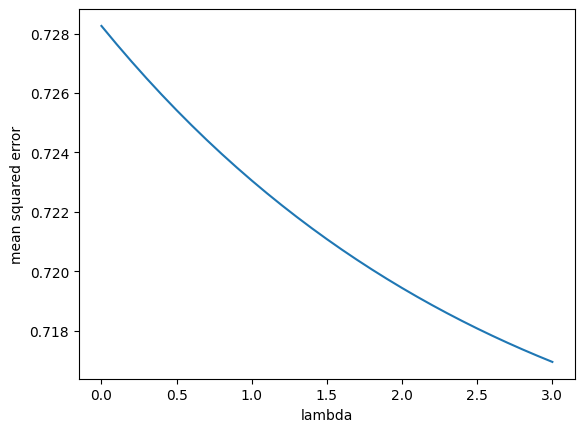

best lambda: 3.0
best cross validation mean squared error: 0.7169510690631486
test mean squared error: 1.4530235513935628


In [7]:
from google.colab import files
uploaded = files.upload()
%ls

import numpy as np
import matplotlib.pyplot as plt

def load_linear_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_targets = np.genfromtxt('test_targets.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_targets = np.genfromtxt('train_targets.csv', delimiter=',')
  return train_inputs, train_targets, test_inputs, test_targets

def predict_linear_regression(inputs, weights):
  predicted_values = np.zeros(inputs.shape[0])
  predicted_values = np.dot(inputs,weights)
  return predicted_values

def eval_linear_regression(inputs, weights, targets):
  mean_squared_error = 0
  predicted_values = predict_linear_regression(inputs,weights)
  for i in range(len(predicted_values)):
    mean_squared_error += (predicted_values[i] - targets[i])**2
  mean_squared_error /= len(predicted_values)
  return mean_squared_error

def train_linear_regression(train_inputs, train_targets, lambda_hyperparam):
  weights = np.zeros(train_inputs.shape[1])
  A = np.zeros((train_inputs.shape[1], train_inputs.shape[1]))
  for i in range(len(train_inputs)):
    A += np.outer(train_inputs[i],train_inputs[i])
  b = np.zeros(train_inputs.shape[1])
  for j in range(len(train_inputs)):
    b += train_inputs[j]*train_targets[j]
  weights = np.linalg.inv(A + lambda_hyperparam*np.identity(train_inputs.shape[1])).dot(b)
  return weights

def cross_validation_linear_regression(k_folds, hyperparameters, inputs, targets):
  best_hyperparam = 0
  best_mean_squared_error = 0
  mean_squared_errors = np.zeros(len(hyperparameters))
  for i in range(len(hyperparameters)):
    mean_squared_error = 0
    for j in range(k_folds):
      one_fold = int(len(inputs)/k_folds)
      validation_inputs = inputs[j*one_fold::one_fold]
      validation_targets = targets[j*one_fold::one_fold]
      if j == 0:
        train_inputs = inputs[(j+1)*one_fold:]
        train_targets = targets[(j+1)*one_fold:]
      elif j == k_folds-1:
        train_inputs = inputs[:j*one_fold]
        train_targets = targets[:j*one_fold]
      else:
        train_inputs = np.concatenate((inputs[:j*one_fold], inputs[(j+1)*one_fold:]))
        train_targets = np.concatenate((targets[:j*one_fold], targets[(j+1)*one_fold:]))
      weights = train_linear_regression(train_inputs, train_targets, hyperparameters[i])
      mean_squared_error += eval_linear_regression(validation_inputs, weights, validation_targets)
    mean_squared_error /= k_folds
    mean_squared_errors[i] = mean_squared_error
    if i == 0 or mean_squared_error < best_mean_squared_error:
      best_mean_squared_error = mean_squared_error
      best_hyperparam = hyperparameters[i]
  return best_hyperparam, best_mean_squared_error, mean_squared_errors

def plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams):
  plt.plot(hyperparams,mean_squared_errors)
  plt.ylabel('mean squared error')
  plt.xlabel('lambda')
  plt.show()

# load data
train_inputs, train_targets, test_inputs, test_targets = load_linear_regression_data()

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# lambda values to be evaluated by cross validation
hyperparams = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
# hyperparams = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
k_folds = 10
best_lambda, best_mean_squared_error, mean_squared_errors = cross_validation_linear_regression(k_folds,hyperparams,train_inputs,train_targets)

# plot results
plot_linear_regression_mean_squared_errors(mean_squared_errors,hyperparams)
print('best lambda: ' + str (best_lambda))
print('best cross validation mean squared error: ' + str(best_mean_squared_error))

# train and evaluate with best lambda
weights = train_linear_regression(train_inputs,train_targets,best_lambda)
mean_squared_error = eval_linear_regression(test_inputs, weights, test_targets)
print('test mean squared error: ' + str(mean_squared_error))